<a href="https://colab.research.google.com/github/rameshavinash94/CMPE255_Clustering/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORT Modules**

In [4]:
#load the necessary libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [ ]:
! pip install pycaret

## **LOAD DATASET**

In [5]:
#load the input data
customers=pd.read_csv("/content/segmentation data.csv")

In [6]:
customers.shape

(2000, 8)

In [7]:
customers.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [8]:
customers.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [9]:
customers.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [10]:
#create a minmax scaler
scaler=MinMaxScaler()
scaled_data =scaler.fit_transform(customers)
Scaled_Df = pd.DataFrame(scaled_data, columns=customers.columns)

In [11]:
Scaled_Df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0.000000,0.0,0.0,0.844828,0.666667,0.324781,0.5,1.0
1,0.000500,1.0,1.0,0.068966,0.333333,0.420210,0.5,1.0
2,0.001001,0.0,0.0,0.534483,0.333333,0.195144,0.0,0.0
3,0.001501,0.0,0.0,0.465517,0.333333,0.496223,0.5,0.5
4,0.002001,0.0,0.0,0.603448,0.333333,0.413842,0.5,0.5
...,...,...,...,...,...,...,...,...
1995,0.997999,1.0,0.0,0.500000,0.333333,0.320595,0.0,0.0
1996,0.998499,1.0,1.0,0.155172,0.333333,0.299460,0.5,0.0
1997,0.998999,0.0,0.0,0.224138,0.000000,0.184871,0.0,0.0
1998,0.999500,1.0,1.0,0.103448,0.333333,0.227162,0.0,0.0


## **PCA to Reduce Dimensionality for Visualization**

In [12]:
pca=PCA(n_components=2)
plot_pca = pca.fit_transform(Scaled_Df)
pca_df = pd.DataFrame(plot_pca)

## **KMEANS FROM SCRATCH**

In [22]:
colors = ["g","r","c","b","k"]

class K_Means:
    def __init__(self, k=4, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

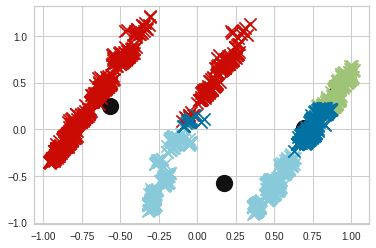

In [23]:
clf = K_Means()

X = np.array(pca_df)
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

## **KMeans**

In [27]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(Scaled_Df)
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[3.68038517e-01 3.67724868e-01 1.00000000e+00 2.93513957e-01
  4.54144621e-01 3.64486929e-01 5.66137566e-01 6.45502646e-01]
 [6.24997416e-01 3.65702479e-01 1.66533454e-15 3.21708464e-01
  2.68595041e-01 2.36104252e-01 1.76652893e-01 3.09917355e-02]
 [6.16048675e-01 9.70731707e-01 1.00000000e+00 2.48135688e-01
  4.01084011e-01 2.61791370e-01 2.91056911e-01 1.35772358e-01]
 [3.43236628e-01 1.91204589e-03 1.83186799e-15 3.79145513e-01
  2.74697259e-01 4.00272245e-01 6.34799235e-01 7.58126195e-01]]


### **Visualization without PCA**

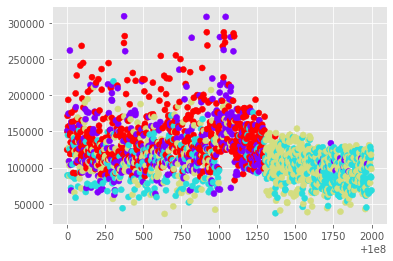

In [28]:
plt.scatter(customers.iloc[:,0], customers.iloc[:, 5], c=kmeans.labels_,cmap='rainbow')
plt.show()

### **Visualization after PCA**

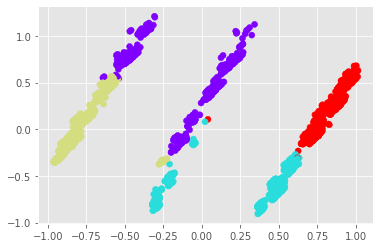

In [29]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=kmeans.labels_,cmap='rainbow')
plt.show()

## **Hierarchical Clustering**

### **Hierarchical Clustering - Single link**

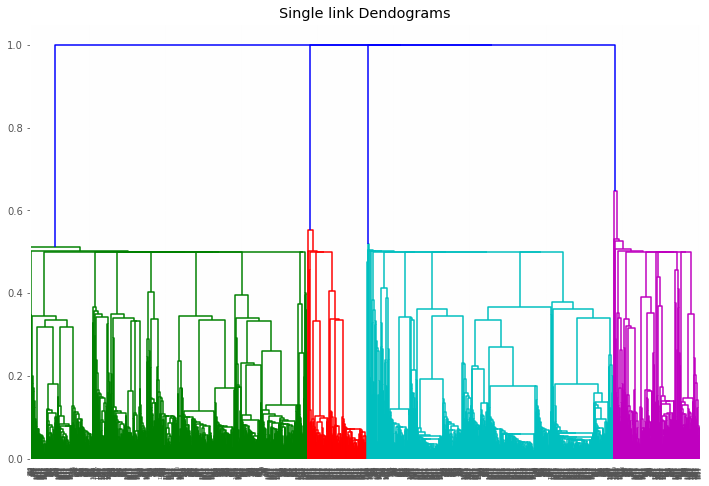

In [30]:
plt.figure(figsize=(12, 8))
plt.title("Single link Dendograms")
dend = shc.dendrogram(shc.linkage(Scaled_Df, method="single"))
plt.show()

#### **Visualization without PCA**

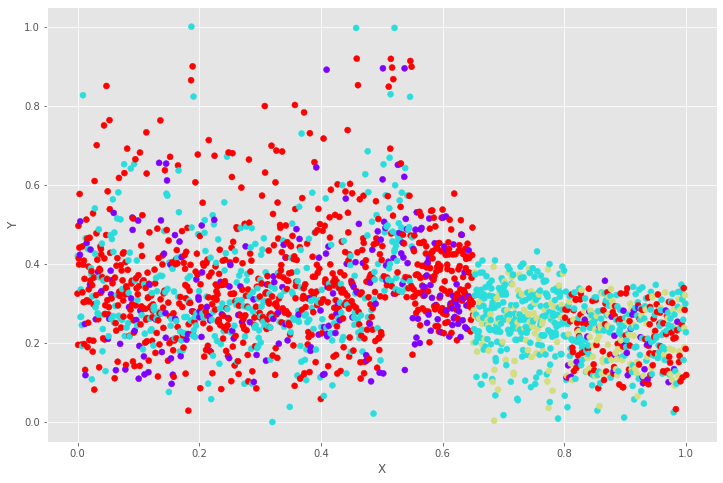

In [31]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="single")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:,5], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### **Visualization after PCA**

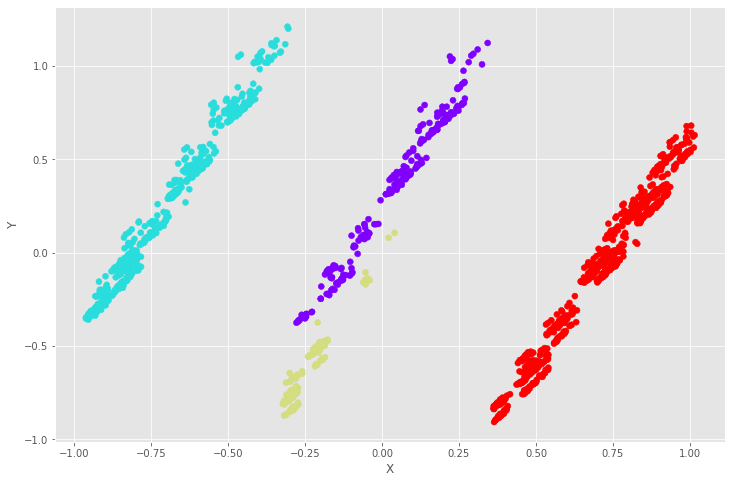

In [32]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="single")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### **Hierarchical Clustering - Average link**

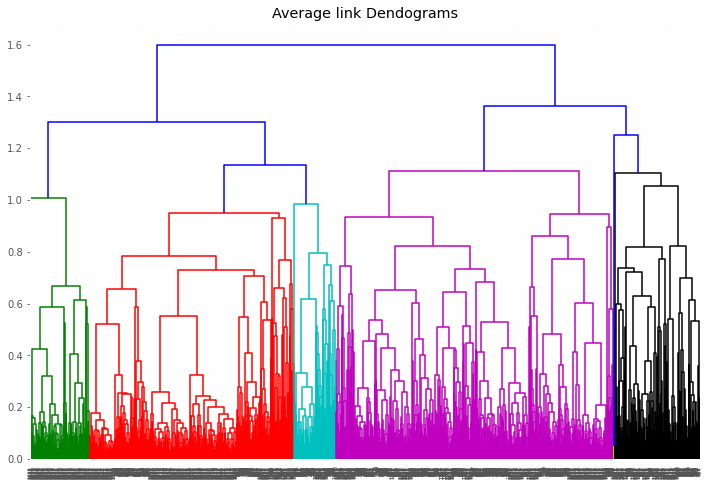

In [33]:
plt.figure(figsize=(12, 8))
plt.title("Average link Dendograms")
dend = shc.dendrogram(shc.linkage(Scaled_Df, method="average"))
plt.show()

#### **Visualization without PCA**

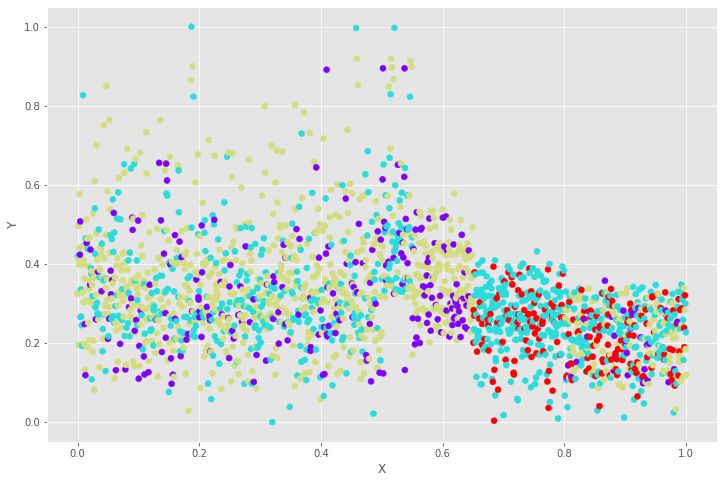

In [34]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:,5], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### **Visualization after PCA**

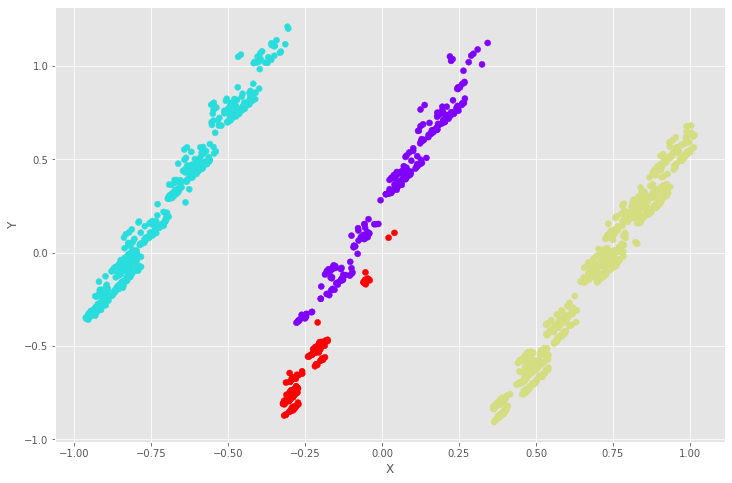

In [35]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### **Hierarchical Clustering - Complete link**

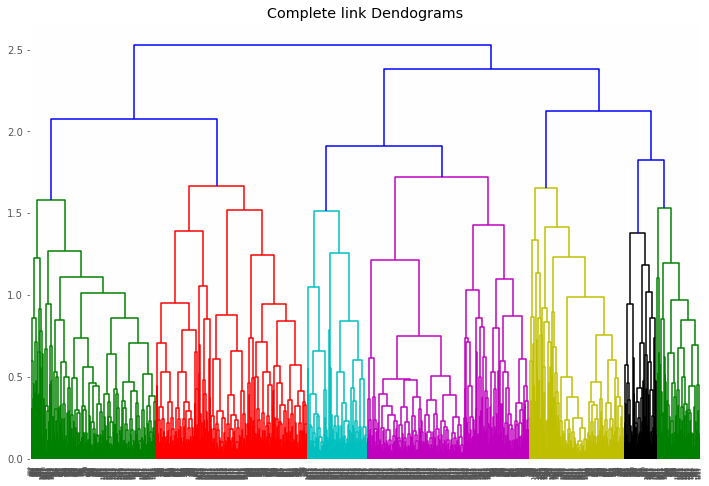

In [36]:
plt.figure(figsize=(12, 8))
plt.title("Complete link Dendograms")
dend = shc.dendrogram(shc.linkage(Scaled_Df, method="complete"))
plt.show()

#### **Visualization without PCA**

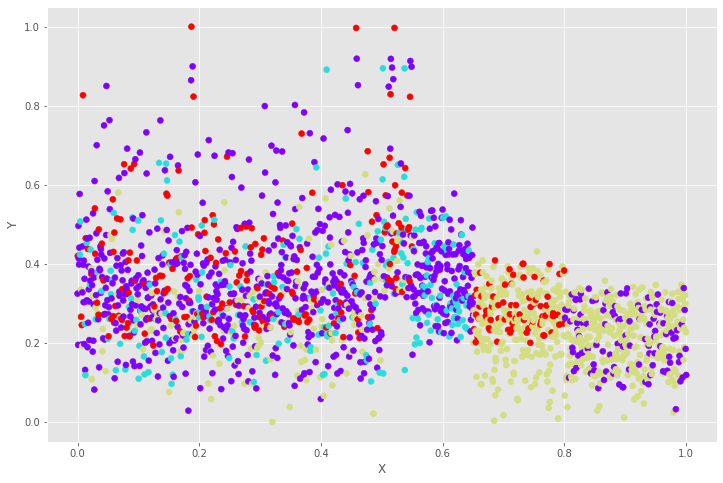

In [37]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="complete")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:,5], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### **Visualization after PCA**

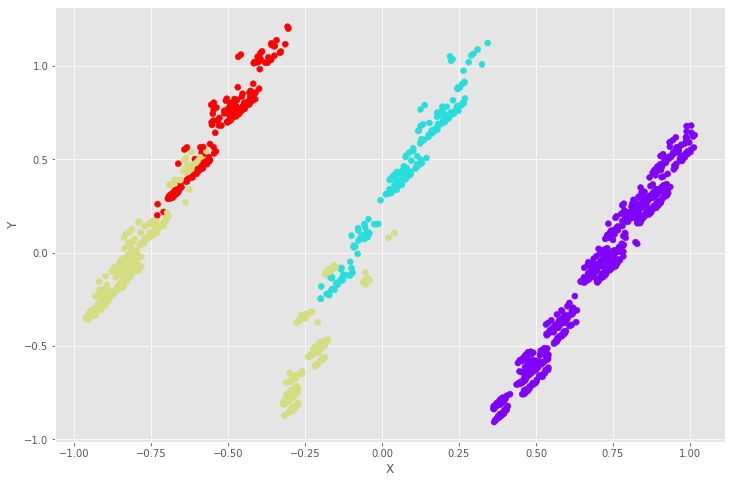

In [38]:
cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="complete")
cluster = cluster.fit_predict(Scaled_Df)
plt.figure(figsize=(12, 8))
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=cluster, cmap="rainbow")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## **Clustering using Gaussian Mixture**

In [39]:
from sklearn import mixture
#Applying Gaussian Mixture function
model_gm = mixture.GaussianMixture(n_components=5).fit_predict(Scaled_Df)

### **Visualization without PCA**

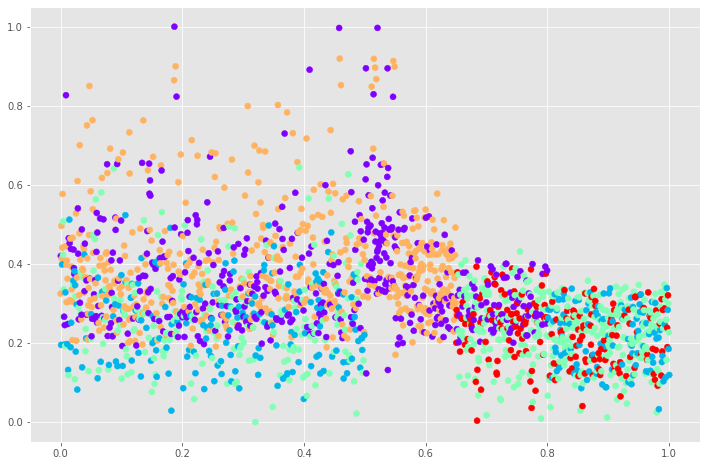

In [40]:
plt.figure(figsize=(12, 8))  
plt.scatter(Scaled_Df.iloc[:,0], Scaled_Df.iloc[:, 5], c=model_gm, cmap='rainbow')

### **Visualization after PCA**

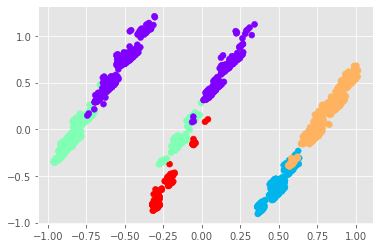

In [41]:
plt.scatter(pca_df.iloc[:,0], pca_df.iloc[:,1], c=model_gm,cmap='rainbow')
plt.show()

## **EXPLORING PYCARET LIBRARY FOR DBSCAN**

In [1]:
from pycaret.clustering import *

In [13]:
#setup
cluster = setup(Scaled_Df, session_id = 7652)

,Description,Value
0,session_id,7652
1,Original Data,"(2000, 8)"
2,Missing Values,False
3,Numeric Features,6
4,Categorical Features,2
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2000, 10)"
9,CPU Jobs,-1


In [14]:
model = create_model('dbscan', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3211,678.8055,1.4223,0,0,0


In [15]:
plot_model(model)

## **We are going to use Pycarat to evaluate the model metrics**

In [16]:
kmeams_model=create_model('kmeans', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4934,1735.1369,0.8153,0,0,0


In [17]:
agglomerative_model=create_model('hclust', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4934,1735.1369,0.8153,0,0,0


In [18]:
dbscan = create_model('dbscan', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3211,678.8055,1.4223,0,0,0


In [19]:
evaluate_model(kmeams_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [20]:
evaluate_model(agglomerative_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

In [21]:
evaluate_model(dbscan)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …